In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
dftreinamento = pd.merge(dftreino, dflojas, on='Store', how='inner')
dfcompeticao = pd.merge(dfteste, dflojas, on='Store', how='inner')

In [4]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dftreinamento['StateHoliday'] = dftreinamento['StateHoliday'].apply(lambda x: strToInt(x))
dftreinamento['StoreType'] = dftreinamento['StoreType'].apply(lambda x: strToInt(x))
dftreinamento['Assortment'] = dftreinamento['Assortment'].apply(lambda x: strToInt(x))

dfcompeticao['StateHoliday'] = dfcompeticao['StateHoliday'].apply(lambda x: strToInt(x))
dfcompeticao['StoreType'] = dfcompeticao['StoreType'].apply(lambda x: strToInt(x))
dfcompeticao['Assortment'] = dfcompeticao['Assortment'].apply(lambda x: strToInt(x))

In [5]:
dftreinamento['Date'] = pd.DatetimeIndex(pd.to_datetime(dftreinamento['Date']), dtype='datetime64[ns]').astype(np.int64)
dfcompeticao['Date'] = pd.DatetimeIndex(pd.to_datetime(dfcompeticao['Date']), dtype='datetime64[ns]').astype(np.int64)

In [6]:
def interval(x):
    if x == 'Feb,May,Aug,Nov':
        return 100
    elif x == 'Jan,Apr,Jul,Oct':
        return 101
    elif x == 'Mar,Jun,Sept,Dec':
        return 102
    else:
        return x

dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].apply(lambda x: interval(x))

dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].apply(lambda x: interval(x))

In [52]:
dftreinamento['Promo2SinceWeek'] = dftreinamento['Promo2SinceWeek'].fillna(dftreinamento['Promo2SinceWeek'].mean())
dftreinamento['Promo2SinceYear'] = dftreinamento['Promo2SinceYear'].fillna(dftreinamento['Promo2SinceYear'].mean())
dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].fillna(dftreinamento['PromoInterval'].mean())
dftreinamento['CompetitionOpenSinceYear'] = dftreinamento['CompetitionOpenSinceYear'].fillna(dftreinamento['CompetitionOpenSinceYear'].mean())
dftreinamento['CompetitionOpenSinceMonth'] = dftreinamento['CompetitionOpenSinceMonth'].fillna(dftreinamento['CompetitionOpenSinceMonth'].mean())
dftreinamento['CompetitionDistance'] = dftreinamento['CompetitionDistance'].fillna(dftreinamento['CompetitionDistance'].mean())

dfcompeticao['Promo2SinceWeek'] = dfcompeticao['Promo2SinceWeek'].fillna(dfcompeticao['Promo2SinceWeek'].mean())
dfcompeticao['Promo2SinceYear'] = dfcompeticao['Promo2SinceYear'].fillna(dfcompeticao['Promo2SinceYear'].mean())
dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].fillna(dfcompeticao['PromoInterval'].mean())
dfcompeticao['CompetitionOpenSinceYear'] = dfcompeticao['CompetitionOpenSinceYear'].fillna(dfcompeticao['CompetitionOpenSinceYear'].mean())
dfcompeticao['CompetitionOpenSinceMonth'] = dfcompeticao['CompetitionOpenSinceMonth'].fillna(dfcompeticao['CompetitionOpenSinceMonth'].mean())
dfcompeticao['CompetitionDistance'] = dfcompeticao['CompetitionDistance'].fillna(dfcompeticao['CompetitionDistance'].mean())
dfcompeticao['Open'] = dfcompeticao['Open'].fillna(dfcompeticao['Open'].mean())
dfcompeticao['Customers'] = dftreinamento['Customers'].mean()

In [117]:
X = dftreinamento[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

In [118]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_features

array([[-1.73164032e+00,  5.01484162e-01,  1.73412321e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       [-1.73164032e+00,  8.30805534e-04,  1.73047962e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       [-1.73164032e+00, -4.99822551e-01,  1.72683602e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       ...,
       [ 1.72897045e+00,  8.30805534e-04, -1.68721550e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00],
       [ 1.72897045e+00, -4.99822551e-01, -1.69085910e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00],
       [ 1.72897045e+00, -1.00047591e+00, -1.69450270e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00]])

In [119]:
XCompScaler = dfcompeticao[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

In [120]:
scaler = StandardScaler()
scaler.fit(XCompScaler)
scaled_features_comp = scaler.transform(XCompScaler)
scaled_features_comp

array([[-1.73259592e+00,  1.03367801e-02,  1.69633458e+00, ...,
         0.00000000e+00,  3.52691580e-13, -5.75989731e-14],
       [-1.73259592e+00, -4.85828664e-01,  1.62415013e+00, ...,
         0.00000000e+00,  3.52691580e-13, -5.75989731e-14],
       [-1.73259592e+00, -9.81994107e-01,  1.55196568e+00, ...,
         0.00000000e+00,  3.52691580e-13, -5.75989731e-14],
       ...,
       [ 1.74571275e+00, -1.47815955e+00, -1.55196568e+00, ...,
        -2.24882275e-01,  1.38886020e-01,  2.14075743e+00],
       [ 1.74571275e+00,  1.49883311e+00, -1.62415013e+00, ...,
        -2.24882275e-01,  1.38886020e-01,  2.14075743e+00],
       [ 1.74571275e+00,  1.00266767e+00, -1.69633458e+00, ...,
        -2.24882275e-01,  1.38886020e-01,  2.14075743e+00]])

In [121]:
df_feat = pd.DataFrame(scaled_features, columns=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])

In [122]:
df_feat.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,-1.73164,0.501484,1.734123,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,1.781172e-15,1.932647e-13,0.0
1,-1.73164,0.000831,1.730480,-0.187648,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,1.781172e-15,1.932647e-13,0.0
2,-1.73164,-0.499823,1.726836,-0.237173,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,1.781172e-15,1.932647e-13,0.0
3,-1.73164,-1.000476,1.723192,-0.157502,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,1.781172e-15,1.932647e-13,0.0
4,-1.73164,-1.501129,1.719549,-0.045533,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,1.781172e-15,1.932647e-13,0.0


In [123]:
df_feat_comp = pd.DataFrame(scaled_features_comp, columns=['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])

In [124]:
df_feat_comp['Customers'] = df_feat['Customers'].median()
df_feat_comp.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers
0,-1.732596,0.010337,1.696335,0.412994,1.235442,-0.066333,-0.892695,0.535045,-1.006474,-0.529113,0.787792,-0.117886,0.0,3.526916e-13,-5.759897e-14,-0.051993
1,-1.732596,-0.485829,1.624150,0.412994,1.235442,-0.066333,-0.892695,0.535045,-1.006474,-0.529113,0.787792,-0.117886,0.0,3.526916e-13,-5.759897e-14,-0.051993
2,-1.732596,-0.981994,1.551966,0.412994,1.235442,-0.066333,-0.892695,0.535045,-1.006474,-0.529113,0.787792,-0.117886,0.0,3.526916e-13,-5.759897e-14,-0.051993
3,-1.732596,-1.478160,1.479781,0.412994,1.235442,-0.066333,-0.892695,0.535045,-1.006474,-0.529113,0.787792,-0.117886,0.0,3.526916e-13,-5.759897e-14,-0.051993
4,-1.732596,1.498833,1.407597,-2.421991,-0.809427,-0.066333,-0.892695,0.535045,-1.006474,-0.529113,0.787792,-0.117886,0.0,3.526916e-13,-5.759897e-14,-0.051993


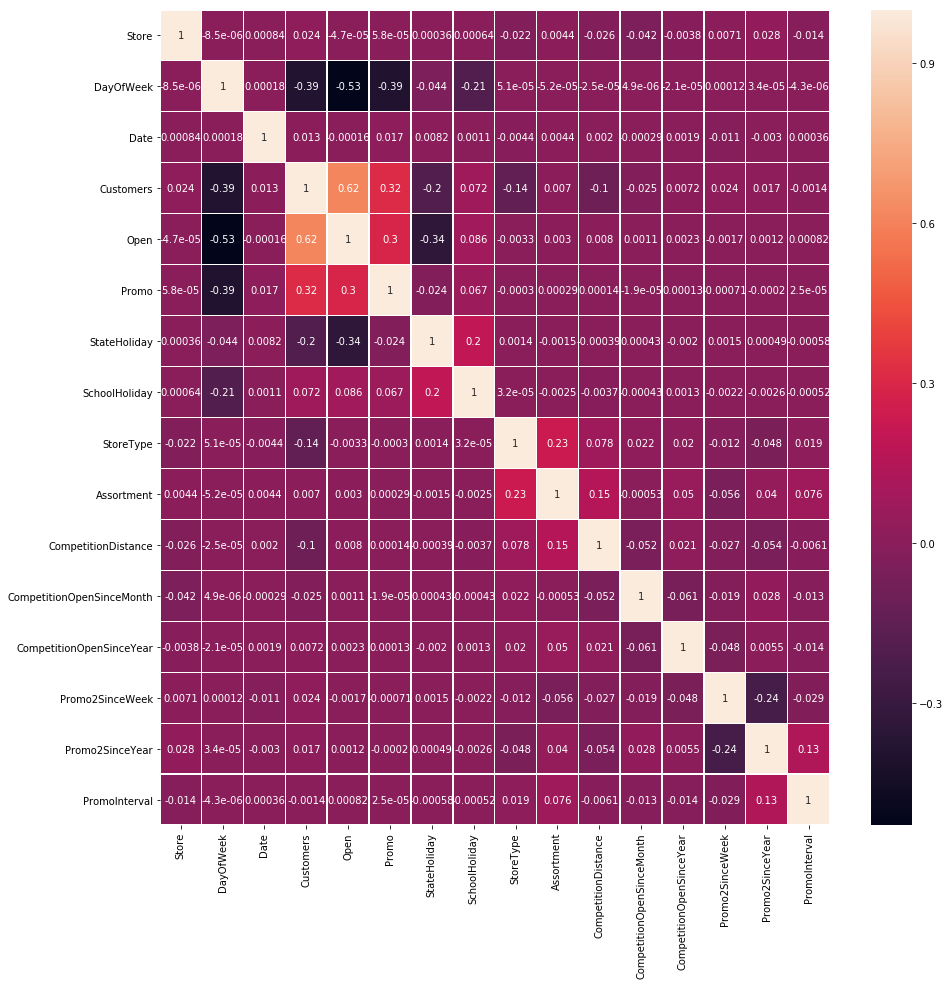

In [125]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_feat.corr(), annot = True, linewidths=.5, ax=ax)

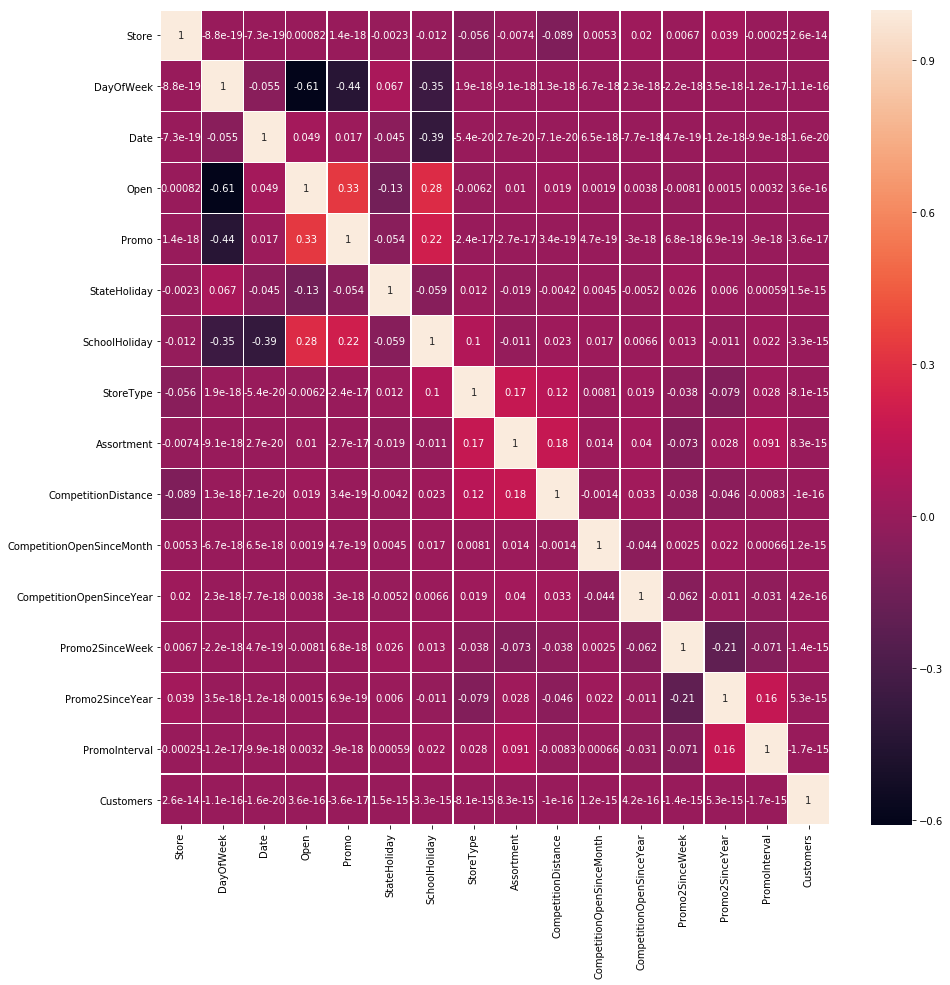

In [126]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_feat_comp.corr(), annot = True, linewidths=.5, ax=ax)

In [127]:
X = df_feat[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]
y = dftreinamento['Sales']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [129]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
lmpredicao = lm.predict(X_test)

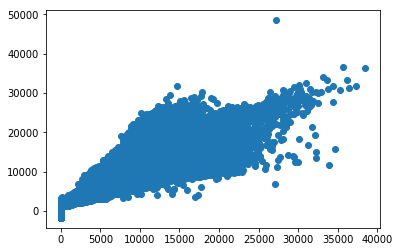

In [131]:
plt.scatter(y_test, lmpredicao)

In [132]:
XComplm = df_feat_comp[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

In [133]:
XComppredicao = lm.predict(XComplm)

In [134]:
XComppredicao

array([6720.433792  , 6780.70479186, 6840.97579172, ..., 7048.56866339,
       3896.30088378, 5450.91735684])

In [135]:
dfPredito = pd.DataFrame(XComppredicao)

In [136]:
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.count()

0    41088
dtype: int64

In [137]:
dfPredito.to_csv('submissionScalerLRFinal.csv')